## ERROR TYPE PREDICTIVE MODELLING

In [1]:
import pandas as pd

df = pd.read_csv("outbound_stagedetails_last_month.csv")

df.head()

,id,plant_code,unit_code,parking_number,trip_id,stage_code,created_date,sending_date,service,weight,...,istel,vendor_number,shift,rfid_user,alert_id,status_flag,direction,loading_point,payload,response
0,732686,N212,N212,NaN,20250704205745887,PI,2025-07-05 00:00:00,2025-07-05 00:00:00,PACKING_IN_SERV,0.0,...,NaN,NaN,NaN,RFC_PI_PLMS,NaN,S,R,NaN,"{""companyCode"":""IN10"",""plant"":""N212"",""tranType...","""Packing-In is Updated."""
1,732687,NE30,NE30,NaN,20250704141446697,PI,2025-07-05 00:00:01,2025-07-05 00:00:01,PACKING_IN_SERV,0.0,...,NaN,NaN,NaN,NaN,NaN,F,R,NaN,"{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...","{""companyCode"":""IN20"",""plant"":""NE30"",""tranType..."
2,732688,NE30,NE30,NaN,20250704154403695,PI,2025-07-05 00:00:01,2025-07-05 00:00:01,PACKING_IN_SERV,0.0,...,NaN,NaN,NaN,NaN,NaN,F,R,NaN,"{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...","{""companyCode"":""IN20"",""plant"":""NE30"",""tranType..."
3,732689,N239,N239,NaN,20250704180545431,PO,2025-07-05 00:00:02,2025-07-05 00:00:02,PACKING_OUT_SER,0.0,...,NaN,NaN,NaN,RFC_PI_PLMS,NaN,S,R,NaN,"{""companyCode"":""IN10"",""plant"":""N239"",""tranType...","""Packing-Out is Updated."""
4,732690,N212,N240,NaN,20250704184013455,PO,2025-07-05 00:00:03,2025-07-05 00:00:03,PACKING_OUT_SER,0.0,...,NaN,NaN,NaN,RFC_PI_PLMS,NaN,S,R,NaN,"{""companyCode"":""IN10"",""plant"":""N240"",""tranType...","""Packing-Out is Updated."""


In [2]:
import pandas as pd
import re

def clsfy_error(response_raw):
    """
    Classifies response messages into error types and subtypes.
    
    Returns:
        (int, str): Tuple of (error_type, error_subtype)
    """
    response = str(response_raw).lower().strip()

    # 1. Null, empty, or explicitly bad values
    if pd.isna(response_raw) or response in ['nan', '', 'none', 'null']:
        return 2, 'No Response'

    # 2. Precompiled regex patterns (ordered: specific → generic)
    error_patterns = [
        (r'503.*service.*unavailable', '503'),
        (r'504.*gateway.*time.?out', '504'),
        (r'500.*internal.*server.*error', '500'),
        (r'403\s*-\s*forbidden', '403'),
        (r'"code"\s*:\s*"403"', '403'),
        (r'\b403\b.*forbidden', '403'),
        (r'rfcadapterexception', 'RFCAdapterException'),
        (r'rfcrepositoryexception', 'RFCRepoError'),
        (r'receiver channel has static errors', 'SAPStaticChannelError'),
        (r'rfc_error_communication', 'RFCCommError'),
        (r'connection.*timed.*out', 'ConnectionTimeout'),
        (r'http.*host.*connect.*exception', 'HostConnectionError'),
        (r'time.?out', 'Timeout'),
        (r'\berror\b', 'OtherError'),  # generic fallback
    ]


    for pattern, label in error_patterns:
        try:
            if re.search(pattern, response, flags=re.IGNORECASE | re.DOTALL):
                return 1, label
        except re.error:
            continue  

    return 0, 'Success'


In [3]:
df[['error_type', 'error_subtype']] = df['response'].apply(lambda x: pd.Series(clsfy_error(x)))
print(df['error_subtype'].value_counts())

error_subtype
Success        722528
No Response     38546
500              3860
503              2232
504               745
OtherError         33
Name: count, dtype: int64


In [ ]:
# sample = '403 Forbidden: {"error": {"code":"403","message":"403 - Forbidden"}}'
# print(clsfy_error(sample))  # ➜ (1, '403')


(1, '403')


In [9]:
df.head()

,id,plant_code,unit_code,parking_number,trip_id,stage_code,created_date,sending_date,service,weight,...,shift,rfid_user,alert_id,status_flag,direction,loading_point,payload,response,error_type,error_subtype
0,732686,N212,N212,NaN,20250704205745887,PI,2025-07-05 00:00:00,2025-07-05 00:00:00,PACKING_IN_SERV,0.0,...,NaN,RFC_PI_PLMS,NaN,S,R,NaN,"{""companyCode"":""IN10"",""plant"":""N212"",""tranType...","""Packing-In is Updated.""",0,Success
1,732687,NE30,NE30,NaN,20250704141446697,PI,2025-07-05 00:00:01,2025-07-05 00:00:01,PACKING_IN_SERV,0.0,...,NaN,NaN,NaN,F,R,NaN,"{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...","{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...",0,Success
2,732688,NE30,NE30,NaN,20250704154403695,PI,2025-07-05 00:00:01,2025-07-05 00:00:01,PACKING_IN_SERV,0.0,...,NaN,NaN,NaN,F,R,NaN,"{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...","{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...",0,Success
3,732689,N239,N239,NaN,20250704180545431,PO,2025-07-05 00:00:02,2025-07-05 00:00:02,PACKING_OUT_SER,0.0,...,NaN,RFC_PI_PLMS,NaN,S,R,NaN,"{""companyCode"":""IN10"",""plant"":""N239"",""tranType...","""Packing-Out is Updated.""",0,Success
4,732690,N212,N240,NaN,20250704184013455,PO,2025-07-05 00:00:03,2025-07-05 00:00:03,PACKING_OUT_SER,0.0,...,NaN,RFC_PI_PLMS,NaN,S,R,NaN,"{""companyCode"":""IN10"",""plant"":""N240"",""tranType...","""Packing-Out is Updated.""",0,Success


In [10]:
df.drop(columns=['id','parking_number','trip_id','weight','shift','rfid_user','alert_id','status_flag','direction','loading_point','payload',
                 'urlto_send', 'username', 'password',
                'delivery_Number', 'transport_id', 'module_id', 'wb_options', 'wb_id',
                'loding_point', 'load_duration', 'tran_type', 'igp', 'remarks',
                'gateIn_no', 'gateOut_number', 'driver_name', 'cleaner_name',
                'licence_number', 'mis_transporter', 'truck_status', 'delivery_mode',
                'sub_lifnr', 'istel', 'vendor_number','status','company_code', 'truck_number','service_name','no_of_attempts']
                    ,inplace=True)

In [11]:
df.columns

Index(['plant_code', 'unit_code', 'stage_code', 'created_date', 'sending_date',
       'service', 'movement_type', 'response', 'error_type', 'error_subtype'],
      dtype='object')

In [10]:
df.head()

,plant_code,unit_code,stage_code,created_date,sending_date,service,movement_type,response,error_type,error_subtype
0,N212,N212,PI,2025-07-05 00:00:00,2025-07-05 00:00:00,PACKING_IN_SERV,OB,"""Packing-In is Updated.""",0,Success
1,NE30,NE30,PI,2025-07-05 00:00:01,2025-07-05 00:00:01,PACKING_IN_SERV,OB,"{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...",0,Success
2,NE30,NE30,PI,2025-07-05 00:00:01,2025-07-05 00:00:01,PACKING_IN_SERV,OB,"{""companyCode"":""IN20"",""plant"":""NE30"",""tranType...",0,Success
3,N239,N239,PO,2025-07-05 00:00:02,2025-07-05 00:00:02,PACKING_OUT_SER,OB,"""Packing-Out is Updated.""",0,Success
4,N212,N240,PO,2025-07-05 00:00:03,2025-07-05 00:00:03,PACKING_OUT_SER,OB,"""Packing-Out is Updated.""",0,Success


In [12]:
df['unit_code'] = df['unit_code'].fillna('UNKNOWN')


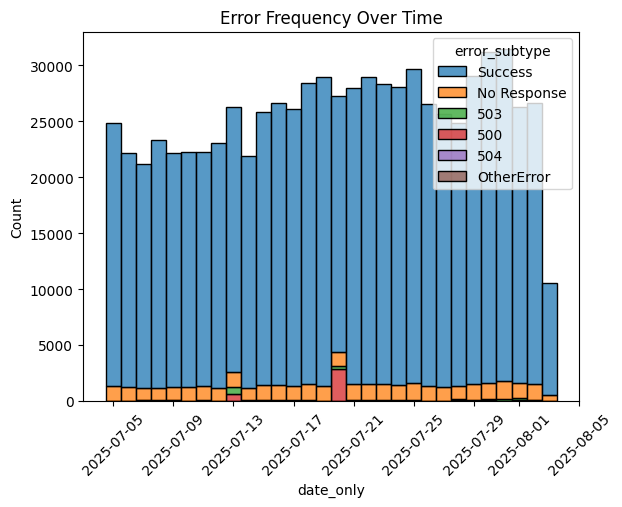

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

# Errors over time
df['date_only'] = df['created_date'].dt.date

sns.histplot(data=df, x='date_only', hue='error_subtype', multiple='stack', bins=30)
plt.xticks(rotation=45)
plt.title('Error Frequency Over Time')
plt.show()


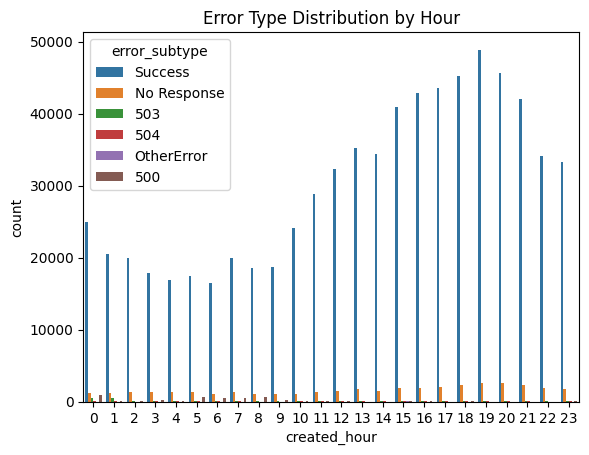

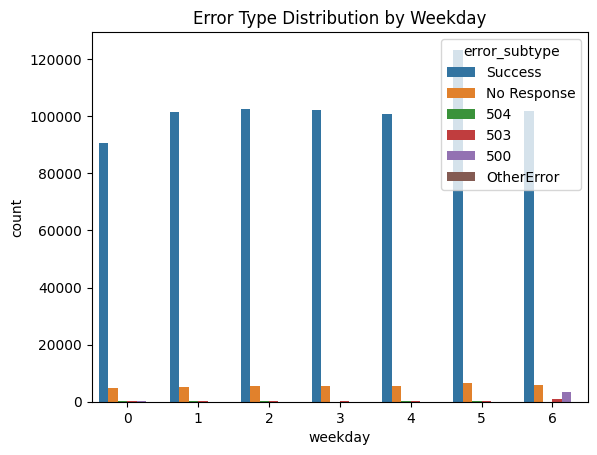

In [14]:
df['created_hour'] = df['created_date'].dt.hour
df['weekday'] = df['created_date'].dt.weekday

sns.countplot(data=df, x='created_hour', hue='error_subtype')
plt.title('Error Type Distribution by Hour')
plt.show()

sns.countplot(data=df, x='weekday', hue='error_subtype')
plt.title('Error Type Distribution by Weekday')
plt.show()


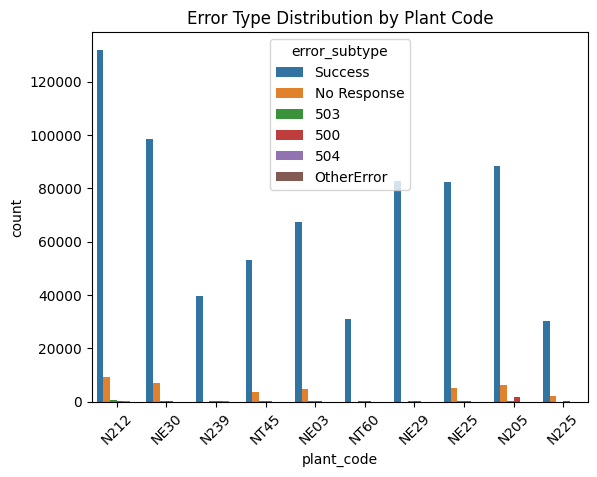

In [15]:
top_plants = df['plant_code'].value_counts().head(10).index
sns.countplot(data=df[df['plant_code'].isin(top_plants)], 
              x='plant_code', hue='error_subtype')
plt.title('Error Type Distribution by Plant Code')
plt.xticks(rotation=45)
plt.show()

In [16]:
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:

# df_errors = df[df['error_subtype'] != 'Success'].copy()

# # Calculate error rate per plant
# plant_error_rate = df_errors.groupby('plant_code')['error_subtype'].count() / len(df_errors)

# # Map back to the filtered dataset
# df_errors['plant_error_rate'] = df_errors['plant_code'].map(plant_error_rate)


In [ ]:
# plant_error_rate = df.groupby('plant_code')['error_subtype'].count() / len(df)

# df['plant_error_rate'] = df['plant_code'].map(plant_error_rate)


In [ ]:
# df_model1 = df.drop(['created_date', 'sending_date', 'date_only'], axis=1)

In [ ]:
# print(df_model1[['created_hour', 'weekday', 'is_weekend', 'plant_error_rate']].skew())

created_hour       -0.502811
weekday            -0.079167
is_weekend          0.796162
plant_error_rate   -0.071520
dtype: float64


In [ ]:
# df_model1.isnull().sum()

plant_code              0
unit_code               0
stage_code              0
service                 0
movement_type           0
response            38546
error_subtype           0
created_hour            0
weekday                 0
is_weekend              0
plant_error_rate        0
dtype: int64

In [ ]:
# df_model1.drop(columns=['response'],inplace=True)

In [ ]:
# df_model1.columns

Index(['plant_code', 'unit_code', 'stage_code', 'service', 'movement_type',
       'error_subtype', 'created_hour', 'weekday', 'is_weekend',
       'plant_error_rate'],
      dtype='object')

## 2-MODEL APPROACH (stage-2a+2b)

### Stage-2A (Training a model for classifying 504 vs no 504 error)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import joblib


# 0) Prepare binary dataset: 504 vs Rest
df_stage2a = df[df['error_subtype'] != 'Success'].copy()
df_stage2a['target_504'] = (df_stage2a['error_subtype'] == '504').astype(int)


# 1) Basic feature engineering
df_stage2a['plant_error_rate'] = df_stage2a.groupby('plant_code')['plant_code'].transform('count') / len(df_stage2a)
df_stage2a['unit_error_count'] = df_stage2a.groupby('unit_code')['unit_code'].transform('count')
df_stage2a['plant_stage'] = df_stage2a['plant_code'].astype(str) + "_" + df_stage2a['stage_code'].astype(str)
ps_freq = df_stage2a['plant_stage'].value_counts(normalize=True).to_dict()
df_stage2a['plant_stage_freq'] = df_stage2a['plant_stage'].map(ps_freq)

feature_cols_2a = [
    'plant_code', 'unit_code', 'stage_code', 'service', 'movement_type',
    'created_hour', 'weekday', 'is_weekend',
    'plant_error_rate', 'unit_error_count', 'plant_stage_freq'
]

# 2) Label encode categorical
cat_cols = ['plant_code', 'unit_code', 'stage_code', 'service', 'movement_type']
label_encoders_2a = {}
for col in cat_cols:
    le = LabelEncoder()
    df_stage2a[col] = le.fit_transform(df_stage2a[col].astype(str))
    label_encoders_2a[col] = le

joblib.dump(label_encoders_2a, "label_encoders_stage2a.pkl")


['label_encoders_stage2a.pkl']

In [ ]:


# 3) Train/test split
X = df_stage2a[feature_cols_2a]
y = df_stage2a['target_504']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Class counts (train):", Counter(y_train))

# 4) Class weights
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = {cls: w for cls, w in zip(classes, weights)}
sample_weights = np.array([class_weights_dict[label] for label in y_train])


# 5) Train model
model_2a = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist'
)

model_2a.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=True
)


Class counts (train): Counter({0: 35736, 1: 596})
[0]	validation_0-logloss:0.67488
[1]	validation_0-logloss:0.65077
[2]	validation_0-logloss:0.63412
[3]	validation_0-logloss:0.61482
[4]	validation_0-logloss:0.59553
[5]	validation_0-logloss:0.57830
[6]	validation_0-logloss:0.56193
[7]	validation_0-logloss:0.54726
[8]	validation_0-logloss:0.53335
[9]	validation_0-logloss:0.52005
[10]	validation_0-logloss:0.50796
[11]	validation_0-logloss:0.49659
[12]	validation_0-logloss:0.48637
[13]	validation_0-logloss:0.47601
[14]	validation_0-logloss:0.46653
[15]	validation_0-logloss:0.45862
[16]	validation_0-logloss:0.45075
[17]	validation_0-logloss:0.44514
[18]	validation_0-logloss:0.43738
[19]	validation_0-logloss:0.43192
[20]	validation_0-logloss:0.42395
[21]	validation_0-logloss:0.41776
[22]	validation_0-logloss:0.41210
[23]	validation_0-logloss:0.40747
[24]	validation_0-logloss:0.40088
[25]	validation_0-logloss:0.39547
[26]	validation_0-logloss:0.39201
[27]	validation_0-logloss:0.38716
[28]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:

# 6) Tune threshold
y_prob = model_2a.predict_proba(X_test)[:, 1]  # prob of class "504"

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

best_thresh = 0.5
best_f1 = 0
for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.70:  # keep recall high
        f1 = 2 * (p * r) / (p + r + 1e-6)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

print(f"Best threshold for recall>=0.70: {best_thresh:.3f} with F1={best_f1:.3f}")


Best threshold for recall>=0.70: 0.639 with F1=0.227


In [ ]:
# 7) Final evaluation with tuned threshold
y_pred_thresh = (y_prob >= best_thresh).astype(int)

print("\n[Stage-2A] Classification Report (tuned threshold):")
print(classification_report(y_test, y_pred_thresh))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))



[Stage-2A] Classification Report (tuned threshold):
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8935
           1       0.14      0.70      0.23       149

    accuracy                           0.92      9084
   macro avg       0.57      0.81      0.59      9084
weighted avg       0.98      0.92      0.95      9084


Confusion Matrix:
[[8265  670]
 [  44  105]]


In [ ]:
# 8) Save model & threshold
joblib.dump(model_2a, "xgb_stage2a_504_vs_rest.pkl")
joblib.dump(best_thresh, "stage2a_best_threshold.pkl")


['stage2a_best_threshold.pkl']

### Stage-2B: Train model to classify 500 / 503 /No response

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
import joblib

# 0) Prepare data (remove 504 from Stage-2A output)
df_stage2b = df[df['error_subtype'].isin(['500', '503', 'No Response'])].copy()

print("Stage-2B dataset shape:", df_stage2b.shape)
print("Subtype counts:\n", df_stage2b['error_subtype'].value_counts())


Stage-2B dataset shape: (44638, 14)
Subtype counts:
 error_subtype
No Response    38546
500             3860
503             2232
Name: count, dtype: int64


In [ ]:
# 1) Feature engineering (same as Stage-2A)
plant_err_count = df_stage2b.groupby('plant_code').size()
total_err = len(df_stage2b)
plant_error_rate = (plant_err_count / total_err).to_dict()
df_stage2b['plant_error_rate'] = df_stage2b['plant_code'].map(plant_error_rate).fillna(0)

unit_err_count = df_stage2b.groupby('unit_code').size().to_dict()
df_stage2b['unit_error_count'] = df_stage2b['unit_code'].map(unit_err_count).fillna(0)

df_stage2b['plant_stage'] = df_stage2b['plant_code'].astype(str) + "_" + df_stage2b['stage_code'].astype(str)
ps_freq = df_stage2b['plant_stage'].value_counts(normalize=True).to_dict()
df_stage2b['plant_stage_freq'] = df_stage2b['plant_stage'].map(ps_freq).fillna(0)

feature_cols_2b = [
    'plant_code', 'unit_code', 'stage_code', 'service', 'movement_type',
    'created_hour', 'weekday', 'is_weekend',
    'plant_error_rate', 'unit_error_count', 'plant_stage_freq'
]


In [ ]:
# 2) Label encode categorical features
cat_cols = ['plant_code', 'unit_code', 'stage_code', 'service', 'movement_type']
label_encoders_2b = {}
for col in cat_cols:
    le = LabelEncoder()
    df_stage2b[col] = le.fit_transform(df_stage2b[col].astype(str))
    label_encoders_2b[col] = le

joblib.dump(label_encoders_2b, "label_encoders_stage2b.pkl")



['label_encoders_stage2b.pkl']

In [ ]:
# 3) Encode target
le_subtype_2b = LabelEncoder()
df_stage2b['error_subtype_enc'] = le_subtype_2b.fit_transform(df_stage2b['error_subtype'])
joblib.dump(le_subtype_2b, "le_error_subtype_stage2b.pkl")

X = df_stage2b[feature_cols_2b]
y = df_stage2b['error_subtype_enc']


In [ ]:
# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before SMOTE counts:", Counter(y_train))

Before SMOTE counts: Counter({2: 30836, 0: 3088, 1: 1786})


In [ ]:
# 5) SMOTE with caps
counts = Counter(y_train)
majority = max(counts.values())
cap_general = 5000
sampling_strategy = {}

for lbl, cnt in counts.items():
    if cnt == majority:
        continue
    sampling_strategy[lbl] = min(cap_general, majority)

print("SMOTE sampling_strategy:", sampling_strategy)

smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE counts:", Counter(y_train_res))

SMOTE sampling_strategy: {0: 5000, 1: 5000}
After SMOTE counts: Counter({2: 30836, 0: 5000, 1: 5000})


In [ ]:
# 6) Class weights
classes_unique = np.unique(y_train_res)
class_weights = compute_class_weight('balanced', classes=classes_unique, y=y_train_res)
weights_dict = {cls: w for cls, w in zip(classes_unique, class_weights)}
sample_weights = np.array([weights_dict[int(label)] for label in y_train_res])

In [ ]:

# 7) Train XGBoost
model_2b = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le_subtype_2b.classes_),
    eval_metric='mlogloss',
    learning_rate=0.05,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist'
)

model_2b.fit(
    X_train_res, y_train_res,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# 8) Evaluation
y_pred = model_2b.predict(X_test)
print("\n[Stage-2B] Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_subtype_2b.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))



[0]	validation_0-mlogloss:1.03892
[1]	validation_0-mlogloss:0.98379
[2]	validation_0-mlogloss:0.93267
[3]	validation_0-mlogloss:0.88569
[4]	validation_0-mlogloss:0.84218
[5]	validation_0-mlogloss:0.80204
[6]	validation_0-mlogloss:0.76464
[7]	validation_0-mlogloss:0.72949
[8]	validation_0-mlogloss:0.69661
[9]	validation_0-mlogloss:0.66583
[10]	validation_0-mlogloss:0.63728
[11]	validation_0-mlogloss:0.61044
[12]	validation_0-mlogloss:0.58559
[13]	validation_0-mlogloss:0.56192
[14]	validation_0-mlogloss:0.53984
[15]	validation_0-mlogloss:0.51904
[16]	validation_0-mlogloss:0.49951
[17]	validation_0-mlogloss:0.48095
[18]	validation_0-mlogloss:0.46343
[19]	validation_0-mlogloss:0.44694
[20]	validation_0-mlogloss:0.43132
[21]	validation_0-mlogloss:0.41668
[22]	validation_0-mlogloss:0.40292
[23]	validation_0-mlogloss:0.38999
[24]	validation_0-mlogloss:0.37771
[25]	validation_0-mlogloss:0.36617
[26]	validation_0-mlogloss:0.35509
[27]	validation_0-mlogloss:0.34443
[28]	validation_0-mlogloss:0.3

In [ ]:
# exporting the model 
joblib.dump(model_2b, "xgb_stage2b_500_503_noresp.pkl")

print("✅ Stage-2B model saved.")

✅ Stage-2B model saved.


In [47]:
with open("stage2a_model_features.txt", "w") as f:
    for col in feature_cols:
        f.write(f"{col}\n")

# For Stage-2B
with open("stage2b_model_features.txt", "w") as f:
    for col in feature_cols:
        f.write(f"{col}\n")


### Preprocessing pipeline

In [ ]:
# stage2_preprocessing.py
import pandas as pd
import joblib

# =========================
# CONFIG
# =========================
DROP_COLS = [
    'id','parking_number','trip_id','weight','shift','rfid_user','alert_id','status_flag','direction','loading_point','payload',
    'urlto_send', 'username', 'password',
    'delivery_Number', 'transport_id', 'module_id', 'wb_options', 'wb_id',
    'loding_point', 'load_duration', 'tran_type', 'igp', 'remarks',
    'gateIn_no', 'gateOut_number', 'driver_name', 'cleaner_name',
    'licence_number', 'mis_transporter', 'truck_status', 'delivery_mode',
    'sub_lifnr', 'istel', 'vendor_number','status','company_code', 'truck_number','service_name','no_of_attempts'
]

FEATURE_COLS = [
    'plant_code', 'unit_code', 'stage_code', 'service', 'movement_type',
    'created_hour', 'weekday', 'is_weekend',
    'plant_error_rate', 'unit_error_count', 'plant_stage_freq'
]

# =========================
# FUNCTION
# =========================
def preprocess_stage2(df_raw, stage="2a"):
    """
    Preprocess raw dataframe for Stage-2A or Stage-2B prediction.

    stage: "2a" for 504-vs-Rest, "2b" for 500/503/NoResp
    """
    df = df_raw.copy()

    # 1) Drop irrelevant columns
    df.drop(columns=[c for c in DROP_COLS if c in df.columns], inplace=True, errors='ignore')

    # 2) Handle missing
    if 'unit_code' in df.columns:
        df['unit_code'] = df['unit_code'].fillna('UNKNOWN')

    # 3) Datetime features
    df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
    df['created_hour'] = df['created_date'].dt.hour
    df['weekday'] = df['created_date'].dt.weekday
    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

    # 4) Filter + target setup
    if stage == "2a":
        df = df[df['error_subtype'] != 'Success'].copy()
        df['target_504'] = (df['error_subtype'] == '504').astype(int)
    elif stage == "2b":
        df = df[df['error_subtype'] != 'Success'].copy()
        df = df[df['error_subtype'] != '504'].copy()

    # 5) Basic feature engineering
    plant_err_rate = df.groupby('plant_code')['plant_code'].transform('count') / len(df)
    df['plant_error_rate'] = plant_err_rate
    df['unit_error_count'] = df.groupby('unit_code')['unit_code'].transform('count')

    df['plant_stage'] = df['plant_code'].astype(str) + "_" + df['stage_code'].astype(str)
    ps_freq = df['plant_stage'].value_counts(normalize=True).to_dict()
    df['plant_stage_freq'] = df['plant_stage'].map(ps_freq).fillna(0)

    # 6) Label encoding (use saved encoders from training)
    enc_path = f"label_encoders_stage{stage}.pkl"
    label_encoders = joblib.load(enc_path)
    for col, le in label_encoders.items():
        df[col] = le.transform(df[col].astype(str))

    # 7) Final feature dataframe
    X = df[FEATURE_COLS].copy()
    return X, df



In [ ]:
import pandas as pd
import sqlalchemy

username = "ReadOnly"
password = "Amazin%40123"
host = "10.0.4.23"
port = 3306
database = "interfaceplms"

engine = sqlalchemy.create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

query = """
SELECT id, company_code, plant_code, unit_code, truck_number, 
       concat('T',trip_id) as trip_id, 
       movement_type, unique_number, igp, stage_code, 
       sending_date, receiving_date, weight, status, no_of_attempts, 
       service, urlto_send, username, password, remarks, payload, response
FROM interfaceplms.inbound_stagedetails
WHERE response LIKE '%%"cause":null,"stackTrace":%%' 
  AND sending_date BETWEEN '2025-09-01 00:01:01' AND '2025-09-05 11:01:01';
"""

df = pd.read_sql(query, engine)

df.to_excel("inbound_stagedetails_filtered.xlsx", index=False)

print("Data exported to inbound_stagedetails_filtered.xlsx")


Data exported to inbound_stagedetails_filtered.xlsx


In [ ]:
import pandas as pd
import sqlalchemy

username = "ReadOnly"
password = "Amazin%40123"
host = "10.0.4.23"
port = 3306
database = "interfaceplms"

engine = sqlalchemy.create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

query = """
SELECT id, company_code, plant_code, unit_code, truck_number, 
       concat('T',trip_id) AS trip_id,
       movement_type, unique_number, igp, stage_code, 
       sending_date, receiving_date, weight, status, no_of_attempts, 
       service, urlto_send, username, password, remarks, payload, response 
FROM interfaceplms.inbound_stagedetails 
WHERE response LIKE ('%%"cause":null,"stackTrace":%%')
"""

df = pd.read_sql(query, engine)

df.to_excel("data.xlsx", index=False)

print("Data exported to data.xlsx")


Data exported to inbound_stagedetails_filtered.xlsx


In [1]:
import pandas as pd
import sqlalchemy

username = "ReadOnly"
password = "Amazin%40123"
host = "10.0.4.23"
port = 3306
database = "interfaceplms"

engine = sqlalchemy.create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

query = """
SELECT 
    *
FROM
    interfaceplms.outbound_stagedetails
WHERE
    sending_date >= NOW() - INTERVAL 7 DAY
    AND (
        response LIKE '%%504 GATEway time-out%%'
        OR response LIKE '%%"cause":null,"stackTrace":%%'
    )
"""

df = pd.read_sql(query, engine)

df.to_excel("exported_data.xlsx", index=False)

print("Data exported to data.xlsx")


Data exported to data.xlsx


In [ ]:
import pandas as pd
import sqlalchemy

username = "ReadOnly"
password = "Amazin%40123"
host = "10.0.4.23"
port = 3306
database = "interfaceplms"

engine = sqlalchemy.create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

query = """
SELECT 
    *
FROM
    interfaceplms.outbound_stagedetails
WHERE
    sending_date >= NOW() - INTERVAL 7 DAY
    AND (
        response LIKE '%%504 GATEway time-out%%'
        OR response LIKE '%%"cause":null,"stackTrace":%%'
    )
    AND (
        service = 'GROSS_WEIGHT_SE'
        OR service = 'TARE_WEIGHT_SER'
    )
"""


df = pd.read_sql(query, engine)

df.to_excel("exported_data_new.xlsx", index=False)

print("Data exported to data.xlsx")

Data exported to data.xlsx


In [1]:
import pandas as pd

# Load the Excel files
df1 = pd.read_csv(r"C:\Users\Saksh\Downloads\SINDIRI VEHICLETAG.csv")
df2 = pd.read_csv(r"C:\Users\Saksh\Downloads\SINDIRI TAGMAPPING CEN.csv")

# Merge on both columns with an indicator
diff = pd.merge(df1, df2, on=['vehicle_number', 'tag_id'], how='outer', indicator=True)

# Keep only rows that are in df1 but not in df2
diff_only_in_df1 = diff[diff['_merge'] == 'left_only'].drop(columns=['_merge'])

# Save the result
diff_only_in_df1.to_excel("difference.xlsx", index=False)

print("Done! Rows present in file1 but not in file2 are saved in 'difference.xlsx'.")


Done! Rows present in file1 but not in file2 are saved in 'difference.xlsx'.
